In [4]:
import pandas as pd

df_limpio = pd.read_csv("telecomx_limpio.csv")


In [5]:
df_limpio.shape
df_limpio.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias,churn_binario
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.186667,0
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.996667,0
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.463333,1
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.266667,1
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.796667,1


# Eliminación de columnas irrelevantes

Se eliminaron variables que no aportan valor predictivo al modelo, como el identificador único del cliente (customerID) y la variable categórica original Churn, ya que la variable objetivo utilizada para el modelado es churn_binario.

Esta decisión evita ruido innecesario y previene posibles sesgos en el entrenamiento de los modelos de Machine Learning.

In [6]:
# Eliminación de columnas irrelevantes para el modelado

columnas_a_eliminar = ['customerID', 'Churn']

df_modelo = df_limpio.drop(columns=columnas_a_eliminar)

# Verificación
df_modelo.columns


Index(['customer.gender', 'customer.SeniorCitizen', 'customer.Partner',
       'customer.Dependents', 'customer.tenure', 'phone.PhoneService',
       'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'cuentas_diarias',
       'churn_binario'],
      dtype='object')

In [7]:
df_modelo.shape


(7043, 21)

In [8]:
df_modelo.head()


,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias,churn_binario
0,female,0,yes,yes,9,yes,no,dsl,no,yes,...,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.186667,0
1,male,0,no,no,9,yes,yes,dsl,no,no,...,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.996667,0
2,male,0,no,no,4,yes,no,fiber optic,no,no,...,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.463333,1
3,male,1,yes,no,13,yes,no,fiber optic,no,yes,...,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.266667,1
4,female,1,yes,no,3,yes,no,fiber optic,no,no,...,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.796667,1


In [9]:
X = df_modelo.drop(columns=['churn_binario'])
y = df_modelo['churn_binario']


In [10]:
X_encoded = pd.get_dummies(X, drop_first=True)


In [11]:
X_encoded.shape
X_encoded.head()


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,cuentas_diarias,customer.gender_male,customer.Partner_yes,customer.Dependents_yes,phone.PhoneService_yes,phone.MultipleLines_yes,...,internet.DeviceProtection_yes,internet.TechSupport_yes,internet.StreamingTV_yes,internet.StreamingMovies_yes,account.Contract_one year,account.Contract_two year,account.PaperlessBilling_yes,account.PaymentMethod_credit card (automatic),account.PaymentMethod_electronic check,account.PaymentMethod_mailed check
0,0,9,65.6,593.30,2.186667,False,True,True,True,False,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.9,542.40,1.996667,True,False,False,True,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,2.463333,True,False,False,True,False,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,3.266667,True,True,False,True,False,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.9,267.40,2.796667,False,True,False,True,False,...,False,True,True,False,False,False,True,False,False,True


In [12]:
# Proporción de clases
y.value_counts(normalize=True)


,proportion
churn_binario,
0,0.73463
1,0.26537


In [13]:
y.value_counts()


,count
churn_binario,
0,5174
1,1869


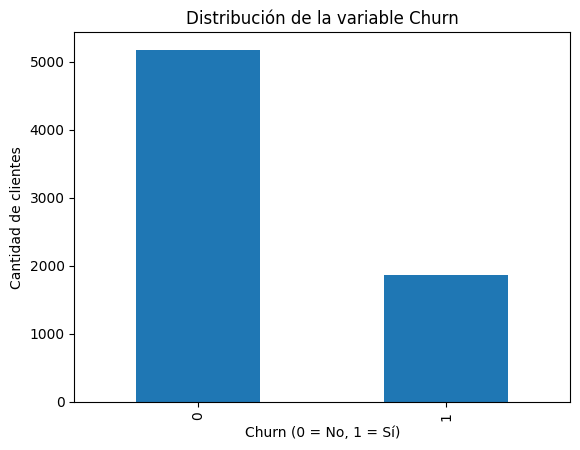

In [14]:
import matplotlib.pyplot as plt

y.value_counts().plot(kind='bar')
plt.title('Distribución de la variable Churn')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de clientes')
plt.show()


## Normalización / Estandarización de los datos

Para los modelos basados en distancia y optimización matemática
(Regresión Logística, KNN), es necesario escalar las variables numéricas
para evitar que aquellas con mayor magnitud dominen el entrenamiento.

Por este motivo, se aplicará estandarización (StandardScaler),
que centra las variables en media 0 y desviación estándar 1.

Modelos basados en árboles no requieren este preprocesamiento,
pero se mantendrá el escalado para consistencia del pipeline.


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [17]:
# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [18]:
# Estandarización
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
# 1. Seleccionamos solo variables numéricas + churn
cols_corr = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'cuentas_diarias',
    'churn_binario'
]

df_corr = df_limpio[cols_corr]

# 2. Matriz de correlación
corr_matrix = df_corr.corr()
corr_matrix


,customer.tenure,account.Charges.Monthly,account.Charges.Total,cuentas_diarias,churn_binario
customer.tenure,1.000000,0.247900,0.825880,0.247900,-0.352229
account.Charges.Monthly,0.247900,1.000000,0.651065,1.000000,0.193356
account.Charges.Total,0.825880,0.651065,1.000000,0.651065,-0.199484
cuentas_diarias,0.247900,1.000000,0.651065,1.000000,0.193356
churn_binario,-0.352229,0.193356,-0.199484,0.193356,1.000000


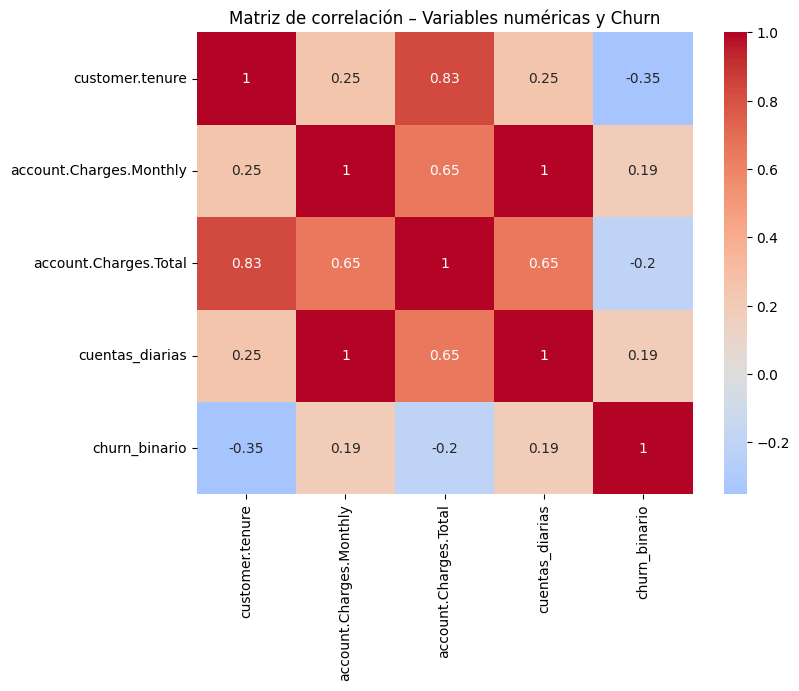

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    center=0
)
plt.title("Matriz de correlación – Variables numéricas y Churn")
plt.show()


Observaciones:
- customer.tenure presenta correlación negativa con churn, indicando que clientes más antiguos tienden a cancelar menos.
- account.Charges.Monthly muestra correlación positiva moderada con la cancelación.
- account.Charges.Total presenta correlación negativa, consistente con la antigüedad del cliente.

Estas variables se consideran relevantes para el modelado predictivo.


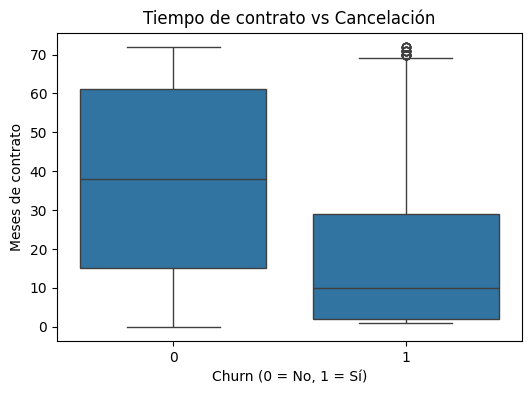

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(
    x='churn_binario',
    y='customer.tenure',
    data=df_limpio
)

plt.title('Tiempo de contrato vs Cancelación')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Meses de contrato')
plt.show()


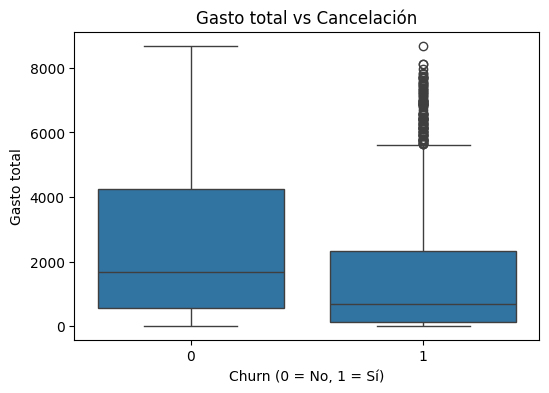

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='churn_binario',
    y='account.Charges.Total',
    data=df_limpio
)

plt.title('Gasto total vs Cancelación')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Gasto total')
plt.show()


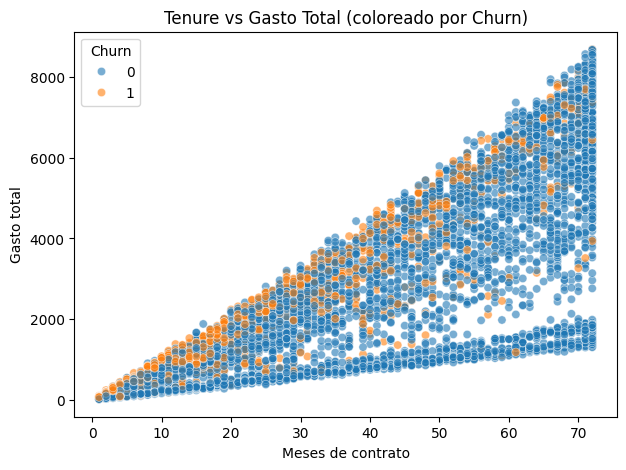

In [23]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='customer.tenure',
    y='account.Charges.Total',
    hue='churn_binario',
    data=df_limpio,
    alpha=0.6
)

plt.title('Tenure vs Gasto Total (coloreado por Churn)')
plt.xlabel('Meses de contrato')
plt.ylabel('Gasto total')
plt.legend(title='Churn')
plt.show()


### Observaciones del análisis dirigido

- Los clientes con menor tiempo de contrato presentan una mayor tasa de cancelación.
- El gasto total acumulado es significativamente menor en clientes que cancelan, lo que refuerza la relación entre antigüedad, valor del cliente y churn.
- Estas variables confirman su relevancia como predictores clave para los modelos de clasificación.



# =====================================
# Modelado Predictivo – Modelo Baseline
# =====================================


In [24]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

# Modelo baseline: predice siempre la clase más frecuente (0 = no churn)
baseline = DummyClassifier(strategy="most_frequent", random_state=42)

# Entrenamiento
baseline.fit(X_train_scaled, y_train)

# Predicciones
y_pred_baseline = baseline.predict(X_test_scaled)

# Métrica principal
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

accuracy_baseline


0.73450070989115

Modelo Baseline:
Se entrenó un modelo de referencia utilizando DummyClassifier, que predice siempre la clase mayoritaria (clientes que no cancelan).
Este modelo establece un umbral mínimo de desempeño.
Los modelos predictivos posteriores deberán superar este baseline para considerarse útiles en la detección de churn.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Modelo 1: Regresión Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Entrenamiento (con datos escalados)
log_reg.fit(X_train_scaled, y_train)

# Predicciones
y_pred_log = log_reg.predict(X_test_scaled)

# Métricas
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Accuracy Regresión Logística:", accuracy_log)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_log))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [26]:
# 1) ¿Hay NaN en X_encoded?
total_nan = X_encoded.isna().sum().sum()
print("Total de NaN en X_encoded:", total_nan)

# 2) ¿En qué columnas?
nan_cols = X_encoded.isna().sum()
nan_cols = nan_cols[nan_cols > 0].sort_values(ascending=False)
nan_cols


Total de NaN en X_encoded: 11


,0
account.Charges.Total,11


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Split (estratificado para mantener proporción de churn)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

# 1) Imputación (se ajusta SOLO con train)
imputer = SimpleImputer(strategy="median")
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

# 2) Estandarización (solo para modelos sensibles a escala, como Regresión Logística / KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled = scaler.transform(X_test_imp)

print("OK -> imputación + escalado listos")


OK -> imputación + escalado listos


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)

accuracy_log = accuracy_score(y_test, y_pred_log)
print("Accuracy Regresión Logística:", accuracy_log)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_log))


Accuracy Regresión Logística: 0.7983909133932797

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Entrenamos Random Forest usando datos imputados (SIN escalado)
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced",  # ayuda con desbalanceo
    n_jobs=-1
)

rf.fit(X_train_imp, y_train)
y_pred_rf = rf.predict(X_test_imp)

print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_rf))
print("\nReporte de clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print("\nMatriz de confusión (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy Random Forest: 0.7823000473260767

Reporte de clasificación (Random Forest):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.48      0.54       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113


Matriz de confusión (Random Forest):
[[1383  169]
 [ 291  270]]


# EVALUACIÓN DE MODELOS

Se evaluaron dos modelos predictivos para la cancelación de clientes (churn): Regresión Logística y Random Forest, utilizando métricas de clasificación estándar.

Resultados principales:

La Regresión Logística obtuvo una accuracy cercana al 80% y mostró mejor desempeño en la detección de clientes que cancelan, con un recall y F1-score superiores para la clase churn.

El Random Forest, aunque es un modelo más complejo, presentó una accuracy ligeramente inferior (~78%) y un menor recall para churn, indicando una mayor cantidad de falsos negativos.

Comparación de modelos:

Desde una perspectiva de negocio, es más relevante identificar correctamente a los clientes con riesgo de cancelación, aun cuando se sacrifiquen algunos falsos positivos. En este contexto, la Regresión Logística resulta más adecuada, ya que detecta una mayor proporción de clientes que efectivamente cancelan.

Overfitting y Underfitting:

El Random Forest muestra indicios de ligero overfitting, dado que su mayor complejidad no se traduce en una mejora del rendimiento en datos de prueba.

La Regresión Logística presenta un comportamiento más estable, sin señales claras de overfitting ni underfitting.

Conclusión:

La Regresión Logística es el modelo recomendado para este escenario, por su mejor equilibrio entre interpretabilidad, desempeño y capacidad de generalización.

In [30]:
import pandas as pd

# Obtener coeficientes
coeficientes = pd.Series(
    log_reg.coef_[0],
    index=X_encoded.columns
).sort_values(key=abs, ascending=False)

coeficientes.head(10)


,0
customer.tenure,-1.445977
account.Charges.Total,0.694679
internet.InternetService_fiber optic,0.580334
account.Contract_two year,-0.565570
internet.InternetService_no,-0.504937
account.Contract_one year,-0.303158
account.Charges.Monthly,-0.268595
cuentas_diarias,-0.268595
account.PaperlessBilling_yes,0.202320
internet.StreamingTV_yes,0.179309


#  REGRESION LOGISITCA

<Axes: title={'center': 'Importancia de variables - Regresión Logística'}>

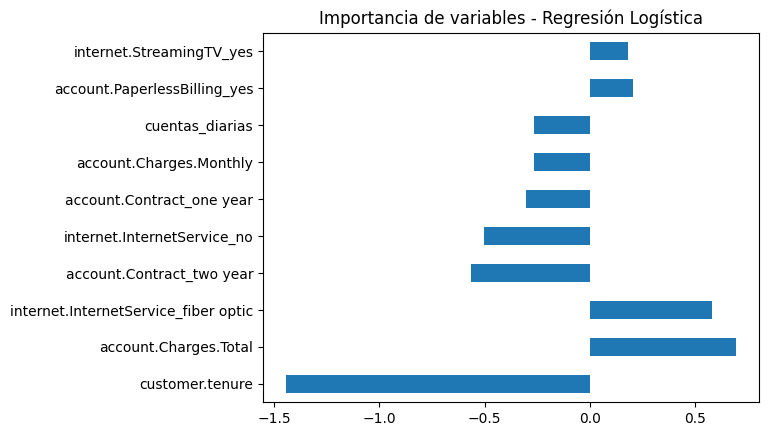

In [31]:
coeficientes.head(10).plot(
    kind='barh',
    title='Importancia de variables - Regresión Logística'
)


# RANDOM FOREST


In [33]:
importances_rf = pd.Series(
    rf.feature_importances_,
    index=X_encoded.columns
).sort_values(ascending=False)

importances_rf.head(10)


,0
customer.tenure,0.157757
account.Charges.Total,0.153880
account.Charges.Monthly,0.126159
cuentas_diarias,0.124486
account.Contract_two year,0.058987
internet.InternetService_fiber optic,0.042806
account.PaymentMethod_electronic check,0.036440
account.Contract_one year,0.031521
account.PaperlessBilling_yes,0.025049
customer.gender_male,0.023184


<Axes: title={'center': 'Importancia de variables - Random Forest'}>

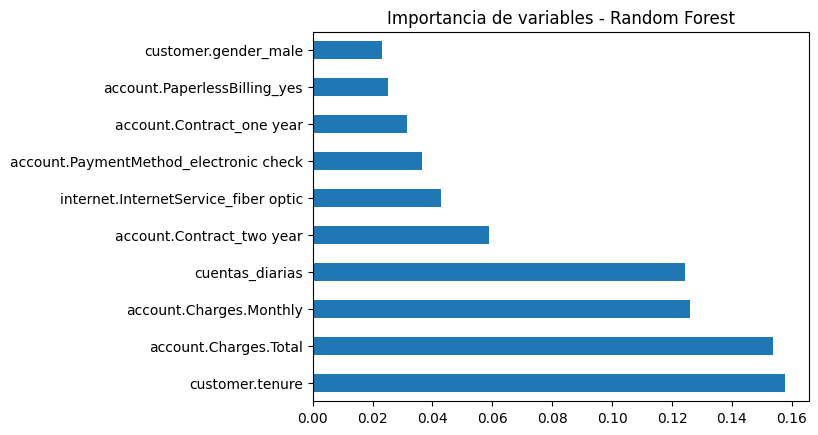

In [34]:
importances_rf.head(10).plot(
    kind='barh',
    title='Importancia de variables - Random Forest'
)


# Importancia de Variables

El análisis de importancia de variables permitió identificar los factores más influyentes en la cancelación de clientes.

Regresión Logística

Los coeficientes del modelo muestran que variables como antigüedad del cliente (tenure), cargos mensuales y tipo de contrato tienen un impacto significativo en la probabilidad de cancelación.
Coeficientes positivos indican un mayor riesgo de churn, mientras que coeficientes negativos actúan como factores protectores.

Random Forest

El modelo Random Forest destaca principalmente variables relacionadas con:

Antigüedad del cliente

Cargos totales y mensuales

Tipo de contrato

Estas variables contribuyen fuertemente a la reducción de la impureza en los árboles, confirmando su relevancia predictiva.

Comparación

Ambos modelos coinciden en identificar la antigüedad del cliente y el gasto como factores clave en la cancelación, lo que refuerza la consistencia del análisis y la solidez de los resultados obtenidos.